In [8]:
## PACKAGES

from linearmodels.datasets import jobtraining
from linearmodels import RandomEffects
from linearmodels import PanelOLS
import statistics
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys
sys.version
import os
import pandas as pd
from patsy import dmatrices

import numpy as np

from sklearn.linear_model import LinearRegression

#os.chdir("/Users/miguelportela/Documents/GitHub/BPLIM-Academy/VSCode")

print(os.getcwd())


/home/jovyan/GitHub/5.Python


In [10]:
## REGRESSION EXAMPLE

### in the Terminal type: wget http://www.stata-press.com/data/r8/nlsw88.dta

df = pd.read_stata('data/nlsw88.dta')
df["wage"].mean()

def linear_regression(df, dep_col, indep_cols):
  lf = LinearRegression(normalize=True)
  lf.fit(df[indep_cols.split(' ')], df[dep_col])

  return lf

#lr = linear_regression(df, 'wage', 'hours')

#print(lr.coef_)

w1 = pd.read_stata('http://qcpages.qc.cuny.edu/~rvesselinov/statadata/WAGE1.DTA')

w1.to_stata('data/wage1.dta')


In [11]:
y=df.wage
X=df.age
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.939
Date:                Sun, 07 Jun 2020   Prob (F-statistic):             0.0866
Time:                        16:38:38   Log-Likelihood:                -7115.8
No. Observations:                2246   AIC:                         1.424e+04
Df Residuals:                    2244   BIC:                         1.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4303      1.558      6.693      0.0

(array([ 34., 187., 350., 321., 289., 219., 184., 147., 131., 112.,  72.,
         33.,  30.,  22.,  23.,  14.,   5.,   7.,   2.,   4.,   3.,   4.,
          4.,   1.,   3.,   1.,   3.,   3.,   3.,   1.,   0.,   6.,   0.,
          0.,  11.,  17.]),
 array([ 1.0049518,  2.1088862,  3.2128205,  4.316755 ,  5.4206896,
         6.524624 ,  7.628558 ,  8.732492 ,  9.836427 , 10.940361 ,
        12.044295 , 13.14823  , 14.252165 , 15.356099 , 16.460033 ,
        17.563967 , 18.667902 , 19.771837 , 20.87577  , 21.979706 ,
        23.08364  , 24.187574 , 25.291508 , 26.395443 , 27.499376 ,
        28.603312 , 29.707245 , 30.81118  , 31.915115 , 33.01905  ,
        34.122982 , 35.226917 , 36.330853 , 37.434788 , 38.53872  ,
        39.642654 , 40.74659  ], dtype=float32),
 <a list of 36 Patch objects>)

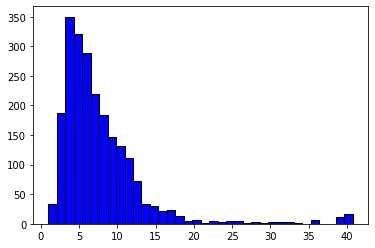

In [12]:
# matplotlib histogram
plt.hist(df['wage'], color='blue', edgecolor='black',
         bins=int(180/5))

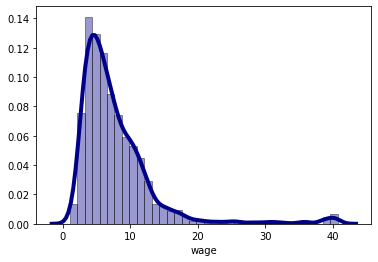

In [13]:
sns.distplot(df['wage'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

In [14]:
# DESCRIPTIVES

print(df.mean())
print(df.std())
print(df.describe())

idcode           2612.654497
age                39.153161
never_married       0.104185
grade              13.098930
south               0.419412
c_city              0.291630
wage                7.766949
hours              37.218109
ttl_exp            12.534977
tenure              5.977850
dtype: float64
idcode           1480.863763
age                 3.060002
never_married       0.305569
grade               2.521246
south               0.493573
c_city              0.454614
wage                5.755523
hours              10.509135
ttl_exp             4.610208
tenure              5.510331
dtype: float64
            idcode          age  never_married        grade        south  \
count  2246.000000  2246.000000    2246.000000  2244.000000  2246.000000   
mean   2612.654497    39.153161       0.104185    13.098930     0.419412   
std    1480.863763     3.060002       0.305569     2.521246     0.493573   
min       1.000000    34.000000       0.000000     0.000000     0.000000   
25%    136

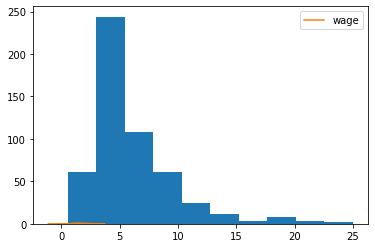

In [15]:
plt.hist(w1['wage'])
ln_wage = np.log(w1['wage'])
sns.kdeplot(ln_wage)

In [16]:
X = w1[['educ', 'female', 'married']]
X = sm.add_constant(X)
m3 = sm.OLS(ln_wage, X).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     88.10
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           3.89e-46
Time:                        16:39:31   Log-Likelihood:                -305.70
No. Observations:                 526   AIC:                             619.4
Df Residuals:                     522   BIC:                             636.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7087      0.094      7.513      0.0

In [17]:
from linearmodels.datasets import jobtraining
data = jobtraining.load()
year = pd.Categorical(data.year)
data = data.set_index(['fcode', 'year'])
data['year'] = year

exog_vars = ['grant', 'employ']
exog = sm.add_constant(data[exog_vars])
mod = RandomEffects(data.clscrap, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                clscrap   R-squared:                        0.0165
Estimator:              RandomEffects   R-squared (Between):              0.0314
No. Observations:                 105   R-squared (Within):               0.0015
Date:                Sun, Jun 07 2020   R-squared (Overall):              0.0199
Time:                        16:39:42   Log-likelihood                   -77.721
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.8542
Entities:                          53   P-value                           0.4286
Avg Obs:                       1.9811   Distribution:                   F(2,102)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             0.8634
                            

/srv/conda/envs/notebook/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [18]:
data_w=pd.read_stata('data/lfp.dta')
data_w.describe()
mod = sm.Probit.from_formula('lfp ~ kids + lhinc + C(id)', data_w)

print(mod)

FileNotFoundError: [Errno 2] No such file or directory: 'data/lfp.dta'